<a href="https://colab.research.google.com/github/beatricekiplagat/Hass-Consulting-Limited/blob/main/Hypothyroidism_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data understanding

#### a) Define the question

Nairobi Hospital conducted a clinical camp to test for hypothyroidism. The data collected focused on Thyroid patients. We are required to use the datasets provided to build a model that determines whether or not the patient's symptoms indicate that the patient has hypothyroid.

#### b) Metrics for success

The project will be considered successful if we are able to use decision trees and SVM to build models that predict whether or not the patient's symptoms indicate that they have hypothyroid.

#### c) Understanding the context

Hypothyroidism (underactive thyroid) is a condition in which your thyroid gland doesn't produce enough of certain crucial hormones.

Hypothyroidism may not cause noticeable symptoms in the early stages. However, over time, untreated hypothyroidism can cause a number of health problems, such as obesity, joint pain, infertility and heart disease.

The different thyroid function tests such as TSH, T3, T4U,
Total T4 (TT4), and Free T4 Index (FTI) are done to assess the
various functions related to the thyroid gland. A normal TSH
and normal T4 is indicative of normal functioning of the
thyroid gland, a low TSH and elevated T4 indicates
hyperthyroidism, a low TSH and low T4 indicates secondary
hypothyroidism, and a high TSH and low T4 indicates primary
hypothyroidism. T3 tests are used for determining the severity
of the hyperthyroidism or to diagnose the hyperthyroidism.

The normal values for these tests are: 

  - TSH that ranges between 0.4 to 5.0 milli-International Unit
per liter.
  
  - Total T4 (TT4) ranges from 4.6 to 12 micrograms per
deciliter of blood.
  - T3 that ranges between 100 to 200 nanogram per deciliter
of blood.
  - Free T4 Index (FTI) or FT4 that ranges
between 0.7-1.9 nanogram per decilitre of blood.

Nairobi Hospital conducted a clinical camp carrying out the above tests to test for hypothyroidism. The data collected focused on Thyroid patients. We are required to use the datasets provided to build a model that determines whether or not the patient's symptoms indicate that the patient has hypothyroid.

#### d) Recording the experimental design 

The following steps will be followed during this exercise:
- Data Understanding
- Data Preparation
- Data Cleaning
- Perform EDA
- Modelling
- Evaluation

#### e) Data relevance. 

The data collected was saved in  .csv formart. It contains the following columns:
- Status: Indicates whether a patient has hypothyroidism or not
- Age: Indicates patient's age
- Sex: Indicates patient's gender
- on_thyroxine: Indicates whether patient is on Thyroxine
- query_on_thyroxine: Indicates whether there are further wqueries on the patient's thyroxine levels.
- on_antithyroid_medication: Indicates whether a patient is on antithyroid medication
- thyroid_surgery: Indicates whether a patient has undergone thyroid surgery.
- query_hypothyroid:  Indicates whether there are further queries on the patient's hypothyroid status.
- query_hyperthyroid: Indicates whether there are further queries on the patient's hyperthyroid status. 
- pregnant: Indicates whether a patient is pregnant
- sick: Indicates whether a patient is sick
- tumor: Indicates whether a patient has a tumor
- lithium: Indicates whether a patient has lithium
- goitre: Indicates whether a patient has lithium
- TSH_measured: Indicates whether a patient's Thyroid Stimulating Hormone was measured
- TSH: Indicates the patient's Thyroid Stimulating Hormone levels, if it was measured
- T3_measured: Indicates a whether a patient's Triiodothyronine was measured
- T3: Indicates the patient's Triiodothyronine levels, if it was measured
- TT4_measured: Indicates a whether a patient's Total Thyroxine was measured
- TT4: Indicates the patient's Total Thyroxine levels, if it was measured.
- T4U_measured:  Indicates whether the patient had the T4 uptake test done on them.
- T4U:  Indicates the patient's levels of thyroxine uptake in the blood, if it was measured.
- FTI_measured: Indicates whether the patient's Free Thyroxine Index was calculated.
- FTI: Indicates the patient's Free Thyroxine Index. 
- TBG_measured: Indicates whether the patient's Thyroid-binding Globulin was measured.
- TBG: Indicates the patient's Thyroid-binding Globulin levels, if it was measured.

# Data preparation

## Importing the libraries. 

In [158]:
# Import all necessary libraries. 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pydotplus
from sklearn.preprocessing import StandardScaler
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO
from IPython.display import Image 
from sklearn.model_selection import RandomizedSearchCV



## Reading the Data 

In [108]:
# Loading our datset
df = pd.read_csv('hypothyroid.csv')
df

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
0,hypothyroid,72,M,f,f,f,f,f,f,f,f,f,f,f,y,30,y,0.6,y,15,y,1.48,y,10,n,?
1,hypothyroid,15,F,t,f,f,f,f,f,f,f,f,f,f,y,145,y,1.7,y,19,y,1.13,y,17,n,?
2,hypothyroid,24,M,f,f,f,f,f,f,f,f,f,f,f,y,0,y,0.2,y,4,y,1,y,0,n,?
3,hypothyroid,24,F,f,f,f,f,f,f,f,f,f,f,f,y,430,y,0.4,y,6,y,1.04,y,6,n,?
4,hypothyroid,77,M,f,f,f,f,f,f,f,f,f,f,f,y,7.3,y,1.2,y,57,y,1.28,y,44,n,?
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3158,negative,58,F,f,f,f,f,f,f,f,f,f,f,f,y,5.8,y,1.7,y,86,y,0.91,y,95,n,?
3159,negative,29,F,f,f,f,f,f,f,f,f,f,f,f,y,0.8,y,1.8,y,99,y,1.01,y,98,n,?
3160,negative,77,M,f,f,f,f,f,f,f,f,f,f,f,y,1.2,y,0.6,y,71,y,0.68,y,104,n,?
3161,negative,74,F,f,f,f,f,f,f,f,f,f,f,f,y,1.3,y,0.1,y,65,y,0.48,y,137,n,?


In [109]:
# Previewing the first 10 records
#
df.head(10)

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
0,hypothyroid,72,M,f,f,f,f,f,f,f,f,f,f,f,y,30,y,0.6,y,15,y,1.48,y,10,n,?
1,hypothyroid,15,F,t,f,f,f,f,f,f,f,f,f,f,y,145,y,1.7,y,19,y,1.13,y,17,n,?
2,hypothyroid,24,M,f,f,f,f,f,f,f,f,f,f,f,y,0,y,0.2,y,4,y,1,y,0,n,?
3,hypothyroid,24,F,f,f,f,f,f,f,f,f,f,f,f,y,430,y,0.4,y,6,y,1.04,y,6,n,?
4,hypothyroid,77,M,f,f,f,f,f,f,f,f,f,f,f,y,7.3,y,1.2,y,57,y,1.28,y,44,n,?
5,hypothyroid,85,F,f,f,f,f,t,f,f,f,f,f,f,y,138,y,1.1,y,27,y,1.19,y,23,n,?
6,hypothyroid,64,F,f,f,f,t,f,f,f,f,f,f,f,y,7.7,y,1.3,y,54,y,0.86,y,63,n,?
7,hypothyroid,72,F,f,f,f,f,f,f,f,f,f,f,f,y,21,y,1.9,y,34,y,1.05,y,32,n,?
8,hypothyroid,20,F,f,f,f,f,t,f,f,f,f,f,f,y,92,n,?,y,39,y,1.21,y,32,n,?
9,hypothyroid,42,F,f,f,f,f,f,f,f,f,f,f,f,y,48,n,?,y,7.6,y,1.02,y,7.5,n,?


In [110]:
# Previewing the last 10 records
#
df.tail(10)

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
3153,negative,78,F,f,f,f,f,f,t,f,f,f,f,f,y,0,y,1.7,y,106,y,1.03,y,99,n,?
3154,negative,72,F,t,f,f,f,f,f,f,f,f,f,f,y,0.01,y,1.1,y,240,y,1.07,y,223,n,?
3155,negative,?,F,f,f,f,f,f,f,f,f,f,f,f,y,0.8,y,2.4,y,123,y,0.99,y,124,n,?
3156,negative,40,F,f,f,f,f,f,f,f,t,f,f,f,y,2.1,y,1.2,y,76,y,0.9,y,84,n,?
3157,negative,69,F,f,f,f,f,f,f,f,f,f,f,f,y,2.6,y,1.8,y,126,y,1.02,y,124,n,?
3158,negative,58,F,f,f,f,f,f,f,f,f,f,f,f,y,5.8,y,1.7,y,86,y,0.91,y,95,n,?
3159,negative,29,F,f,f,f,f,f,f,f,f,f,f,f,y,0.8,y,1.8,y,99,y,1.01,y,98,n,?
3160,negative,77,M,f,f,f,f,f,f,f,f,f,f,f,y,1.2,y,0.6,y,71,y,0.68,y,104,n,?
3161,negative,74,F,f,f,f,f,f,f,f,f,f,f,f,y,1.3,y,0.1,y,65,y,0.48,y,137,n,?
3162,negative,56,F,t,f,f,f,f,f,f,f,f,f,f,y,0,y,1.8,y,139,y,0.97,y,143,n,?


## Exploring the Data

In [111]:
# Checking the number of rows and columns
#
df.shape

(3163, 26)

> Our dataset has 26 columns and 3,163 entries.

In [112]:
# Checking the column datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3163 entries, 0 to 3162
Data columns (total 26 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   status                     3163 non-null   object
 1   age                        3163 non-null   object
 2   sex                        3163 non-null   object
 3   on_thyroxine               3163 non-null   object
 4   query_on_thyroxine         3163 non-null   object
 5   on_antithyroid_medication  3163 non-null   object
 6   thyroid_surgery            3163 non-null   object
 7   query_hypothyroid          3163 non-null   object
 8   query_hyperthyroid         3163 non-null   object
 9   pregnant                   3163 non-null   object
 10  sick                       3163 non-null   object
 11  tumor                      3163 non-null   object
 12  lithium                    3163 non-null   object
 13  goitre                     3163 non-null   object
 14  TSH_meas

> All the columns in the dataset have the object datatype. 

# Data Cleaning
We shall tidy our dataset using the data integrity rules: Validity, Accuracy, Completeness, Consistency & Uniformity

In [113]:
# Cheking our column names
#
df.columns

Index(['status', 'age', 'sex', 'on_thyroxine', 'query_on_thyroxine',
       'on_antithyroid_medication', 'thyroid_surgery', 'query_hypothyroid',
       'query_hyperthyroid', 'pregnant', 'sick', 'tumor', 'lithium', 'goitre',
       'TSH_measured', 'TSH', 'T3_measured', 'T3', 'TT4_measured', 'TT4',
       'T4U_measured', 'T4U', 'FTI_measured', 'FTI', 'TBG_measured', 'TBG'],
      dtype='object')

> Our column titles have no issues, however for consistency, we will change them to lowercase.

In [114]:
# Changing column titles to lower case
#
df.columns = df.columns.str.lower()
# Previewing the columns to confirm whether the changes have taken effect
#
df.columns

Index(['status', 'age', 'sex', 'on_thyroxine', 'query_on_thyroxine',
       'on_antithyroid_medication', 'thyroid_surgery', 'query_hypothyroid',
       'query_hyperthyroid', 'pregnant', 'sick', 'tumor', 'lithium', 'goitre',
       'tsh_measured', 'tsh', 't3_measured', 't3', 'tt4_measured', 'tt4',
       't4u_measured', 't4u', 'fti_measured', 'fti', 'tbg_measured', 'tbg'],
      dtype='object')

> Our column titles are now all consistent.

In [115]:
# Checking for the missing values
df.isna().sum()

status                       0
age                          0
sex                          0
on_thyroxine                 0
query_on_thyroxine           0
on_antithyroid_medication    0
thyroid_surgery              0
query_hypothyroid            0
query_hyperthyroid           0
pregnant                     0
sick                         0
tumor                        0
lithium                      0
goitre                       0
tsh_measured                 0
tsh                          0
t3_measured                  0
t3                           0
tt4_measured                 0
tt4                          0
t4u_measured                 0
t4u                          0
fti_measured                 0
fti                          0
tbg_measured                 0
tbg                          0
dtype: int64

> We have no missing values in our data.

In [116]:
# Checking for duplicates
#
df.duplicated().sum()

77

> Our dataset contains 77 duplicated values. We shall filter them out to check these duplicates

In [117]:
# Filtering out duplicates
#
df[df.duplicated()]

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,tsh_measured,tsh,t3_measured,t3,tt4_measured,tt4,t4u_measured,t4u,fti_measured,fti,tbg_measured,tbg
53,hypothyroid,69,F,f,f,f,f,f,f,f,f,f,f,f,y,21,y,0.8,y,53,y,0.86,y,61,n,?
66,hypothyroid,62,M,f,f,f,f,f,f,f,f,f,f,f,y,100,y,0.4,y,10,y,1,y,10,n,?
124,hypothyroid,77,F,f,f,f,f,f,f,f,f,f,f,f,y,23,y,0.5,y,33,y,0.67,y,49,n,?
128,hypothyroid,79,F,f,f,f,f,f,f,f,f,f,f,f,y,29,y,1.6,y,47,y,0.97,y,48,n,?
131,hypothyroid,50,F,t,f,f,f,f,f,f,f,f,f,f,y,34,n,?,y,55,y,0.93,y,60,n,?
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3048,negative,28,M,f,f,f,f,f,f,f,f,f,f,f,y,1,y,3.1,y,107,y,1.05,y,103,n,?
3055,negative,33,F,f,f,f,f,f,f,f,f,f,f,f,n,?,y,0.8,y,88,y,1.02,y,86,n,?
3066,negative,74,F,t,f,f,f,f,f,f,f,f,f,f,y,21,y,1.8,y,126,y,1.18,y,107,n,?
3111,negative,89,M,f,f,f,f,f,f,f,f,f,f,f,y,1.3,y,0.9,y,82,y,0.8,y,103,n,?


> Most of our 'duplicated' rows have different data on most of the columns, thus we will not be deleting them.

In [118]:
# Check data types
#
df.dtypes

status                       object
age                          object
sex                          object
on_thyroxine                 object
query_on_thyroxine           object
on_antithyroid_medication    object
thyroid_surgery              object
query_hypothyroid            object
query_hyperthyroid           object
pregnant                     object
sick                         object
tumor                        object
lithium                      object
goitre                       object
tsh_measured                 object
tsh                          object
t3_measured                  object
t3                           object
tt4_measured                 object
tt4                          object
t4u_measured                 object
t4u                          object
fti_measured                 object
fti                          object
tbg_measured                 object
tbg                          object
dtype: object

In [119]:
# Some of our colums have "?" as a value, for entries that contain no values. For example, those who's TSH was not measured, you will find that on column "tsh_measured" their values will be "n" and on column "tsh", the entry will have "?"
# Thus we  shall replace them so they look like missing values
import numpy as np
df.replace('?', np.nan, inplace=True)
df

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,tsh_measured,tsh,t3_measured,t3,tt4_measured,tt4,t4u_measured,t4u,fti_measured,fti,tbg_measured,tbg
0,hypothyroid,72,M,f,f,f,f,f,f,f,f,f,f,f,y,30,y,0.6,y,15,y,1.48,y,10,n,NaN
1,hypothyroid,15,F,t,f,f,f,f,f,f,f,f,f,f,y,145,y,1.7,y,19,y,1.13,y,17,n,NaN
2,hypothyroid,24,M,f,f,f,f,f,f,f,f,f,f,f,y,0,y,0.2,y,4,y,1,y,0,n,NaN
3,hypothyroid,24,F,f,f,f,f,f,f,f,f,f,f,f,y,430,y,0.4,y,6,y,1.04,y,6,n,NaN
4,hypothyroid,77,M,f,f,f,f,f,f,f,f,f,f,f,y,7.3,y,1.2,y,57,y,1.28,y,44,n,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3158,negative,58,F,f,f,f,f,f,f,f,f,f,f,f,y,5.8,y,1.7,y,86,y,0.91,y,95,n,NaN
3159,negative,29,F,f,f,f,f,f,f,f,f,f,f,f,y,0.8,y,1.8,y,99,y,1.01,y,98,n,NaN
3160,negative,77,M,f,f,f,f,f,f,f,f,f,f,f,y,1.2,y,0.6,y,71,y,0.68,y,104,n,NaN
3161,negative,74,F,f,f,f,f,f,f,f,f,f,f,f,y,1.3,y,0.1,y,65,y,0.48,y,137,n,NaN


In [120]:
# We will group our numerical and categorical data
#
num_cols = ['age', 'tsh', 't3', 'tt4', 't4u', 'tbg','fti']

cat_cols = ['status', 'sex','tsh_measured', 't3_measured', 'tt4_measured','t4u_measured', 'fti_measured', 'tbg_measured']

In [121]:
# Change numerical columns to float dtype, categories to category dtype and boolean to integer with 0 or 1
#
bool_cols = ['on_thyroxine', 'query_on_thyroxine','on_antithyroid_medication', 'thyroid_surgery', 'query_hypothyroid','query_hyperthyroid', 'pregnant', 'sick', 'tumor', 'lithium', 'goitre']

for column in bool_cols:
  df[column] = df[column].replace('f', 0)
  df[column] = df[column].replace('t', 1)

for column in df.columns:
  if column in num_cols:
    df[column] = df[column].astype('float')
  elif column in cat_cols:
    df[column] = df[column].astype('category')
  elif column in bool_cols:
    df[column] = df[column].astype('int')



In [122]:
# Check data types to confirm conversion
#
df.dtypes

status                       category
age                           float64
sex                          category
on_thyroxine                    int64
query_on_thyroxine              int64
on_antithyroid_medication       int64
thyroid_surgery                 int64
query_hypothyroid               int64
query_hyperthyroid              int64
pregnant                        int64
sick                            int64
tumor                           int64
lithium                         int64
goitre                          int64
tsh_measured                 category
tsh                           float64
t3_measured                  category
t3                            float64
tt4_measured                 category
tt4                           float64
t4u_measured                 category
t4u                           float64
fti_measured                 category
fti                           float64
tbg_measured                 category
tbg                           float64
dtype: objec

In [123]:
# Checking for missing values again
#
df.isnull().sum()

status                          0
age                           446
sex                            73
on_thyroxine                    0
query_on_thyroxine              0
on_antithyroid_medication       0
thyroid_surgery                 0
query_hypothyroid               0
query_hyperthyroid              0
pregnant                        0
sick                            0
tumor                           0
lithium                         0
goitre                          0
tsh_measured                    0
tsh                           468
t3_measured                     0
t3                            695
tt4_measured                    0
tt4                           249
t4u_measured                    0
t4u                           248
fti_measured                    0
fti                           247
tbg_measured                    0
tbg                          2903
dtype: int64

> Our dataset now has quite alot of missing values.  We shalll drop the tbg column as it has close to 50% of it's values as missing.
>
> Since the "tsh", "t3", "tt4", "t4u" & "fti" columns are important tests for our predictions on hypothyroidism, we do not want to skew the data.
>
> Thus we will fill the missing values as 0 since essentially since those tests 
were not performed, the levels are assumed to be 0.


In [124]:
# Dropping "tbg" column
#
df.drop(["tbg"], axis = 1, inplace = True)

# Filling the missing values as 0
#
df[["tsh", "t3", "tt4", "t4u", "fti"]] = df[["tsh", "t3", "tt4", "t4u", "fti"]].fillna(0)

# We shall check for nulls just to make sure our changes were done
#
df.isnull().sum()


status                         0
age                          446
sex                           73
on_thyroxine                   0
query_on_thyroxine             0
on_antithyroid_medication      0
thyroid_surgery                0
query_hypothyroid              0
query_hyperthyroid             0
pregnant                       0
sick                           0
tumor                          0
lithium                        0
goitre                         0
tsh_measured                   0
tsh                            0
t3_measured                    0
t3                             0
tt4_measured                   0
tt4                            0
t4u_measured                   0
t4u                            0
fti_measured                   0
fti                            0
tbg_measured                   0
dtype: int64

> We now only have missing values in age & sex. 
> 
> We shall create a box plot for age column to check for outliers so as to know the appropriate measure of central tendency to impute.
>
> For the sex column, we shall impute the mode since it is the only measure of central tendency that works for categorical data.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


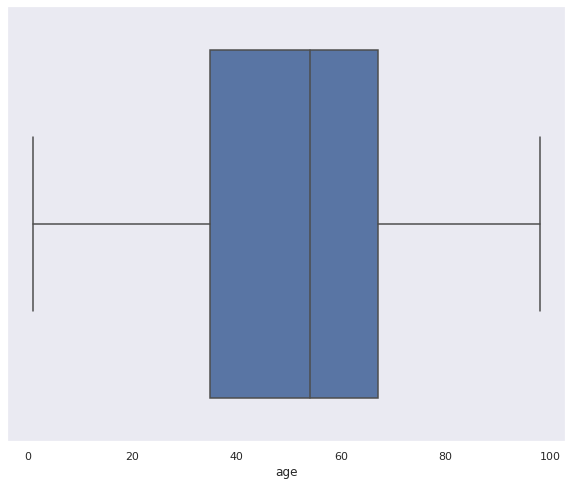

In [125]:
# Box plot for age
#
fig, ax = plt.subplots(figsize = (10,8))
sns.boxplot(df.age)

> We shall impute the age using the mean since there are no significant outliers on our age column

In [126]:
# Imputing the mean for the age column & the mode for the sex column
df['age'].fillna(df["age"].mean(), inplace=True)

# Getting mode for sex column
#
s_mode = df['sex'].mode()

# Impution our mode, 'F
df['sex'].fillna('F', inplace = True)

# Checking for null values again
df.isnull().sum()

status                       0
age                          0
sex                          0
on_thyroxine                 0
query_on_thyroxine           0
on_antithyroid_medication    0
thyroid_surgery              0
query_hypothyroid            0
query_hyperthyroid           0
pregnant                     0
sick                         0
tumor                        0
lithium                      0
goitre                       0
tsh_measured                 0
tsh                          0
t3_measured                  0
t3                           0
tt4_measured                 0
tt4                          0
t4u_measured                 0
t4u                          0
fti_measured                 0
fti                          0
tbg_measured                 0
dtype: int64

> We have no more missing data

In [127]:
# Checking the final shape of our dataset
#
df.shape

(3163, 25)

> Our dataset still contains 3163 entries and 25 columns since we dropped tbg column.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

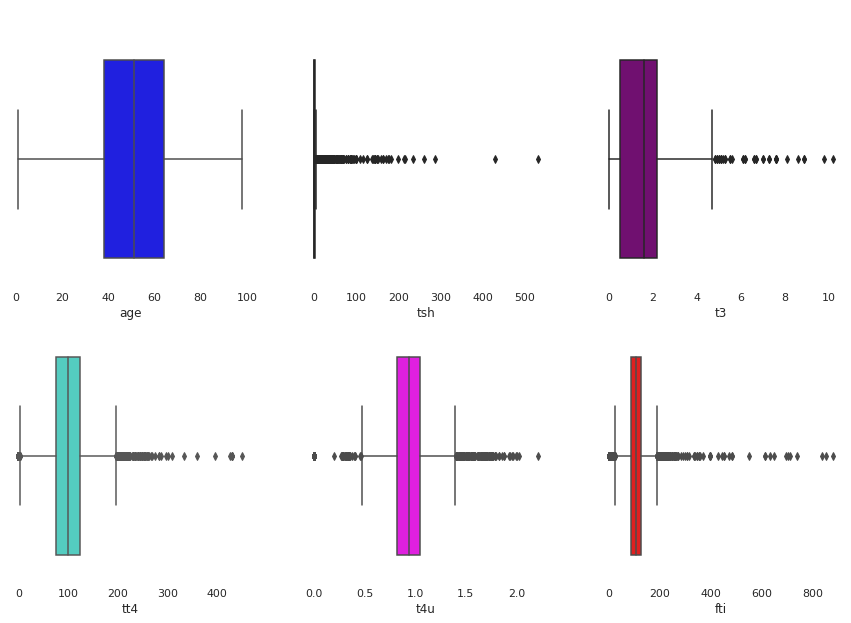

In [128]:
# Checking for outliers
#
# Defining the columns to check for outliers.
num_cols = ['age', 'tsh', 't3', 'tt4', 't4u', 'fti']

df_num = df[num_cols]
# Defining the colors to be used in the boxplots
#
colors = ['blue','green','purple','turquoise','magenta','red','fuchsia','black']
# Used a for loop to plot boxplots for each of the selected columns.
#
fig, axes = plt.subplots(nrows=2,ncols=3,figsize=(15,10))
plt.suptitle('Checking for outliers',fontsize=15,y=0.92,color='white')
for ax,data,column,color in zip(axes.flatten(),df,num_cols,colors):
  sns.boxplot(df[column], ax=ax, color=color)
  ax.set_facecolor('white')

> There are no outliers on the age column
>
> Most of the data on the TSH & TBG column appear as outliers. The rest of the test columns also have alot of outliers. 
>
> We will not be removing our outliers as these are the determining factors of whether one has hypothyroidism

# Perform EDA

## Univariate 

### Measures of Central Tendency & Dispersion

In [129]:
# Plotting the univariate summaries and recording our observations
#

def uni_stats(df):
  out_df = pd.DataFrame(columns=['Count', 'Unique', 'Mode', 'Mean', 'Min','25%', 'Median', '75%', 'Max', 'Std_dev', 'Skew', 'Kurt' ])


  for col in df:
    out_df.loc[col] = [df_num[col].count(), df_num[col].nunique(), df_num[col].mode().values[0], df_num[col].mean(), df_num[col].min(), 
                         df_num[col].quantile(0.25), df_num[col].median(), df_num[col].quantile(0.75), df_num[col].max(), df_num[col].std(), df_num[col].skew(), df_num[col].kurt()]
  return out_df

uni_stats(df_num)

,Count,Unique,Mode,Mean,Min,25%,Median,75%,Max,Std_dev,Skew,Kurt
age,3163.0,93.0,51.154214,51.154214,1.0,38.00,51.154214,64.00,98.00,17.881969,-0.175276,-0.625620
tsh,3163.0,239.0,0.000000,5.046782,0.0,0.00,0.400000,1.80,530.00,22.160083,11.041893,178.553139
t3,3163.0,69.0,0.000000,1.513531,0.0,0.50,1.600000,2.20,10.20,1.191836,1.139446,4.457922
tt4,3163.0,269.0,0.000000,100.281031,0.0,76.00,100.000000,124.00,450.00,52.588757,0.693852,3.873765
t4u,3163.0,158.0,0.000000,0.901502,0.0,0.82,0.940000,1.05,2.21,0.341286,-0.914779,2.320298
fti,3163.0,280.0,0.000000,106.386310,0.0,85.00,105.000000,126.00,881.00,65.607474,3.633281,32.531517


> The plot above contains our measures of central tendency and dispersion. 

### Plots

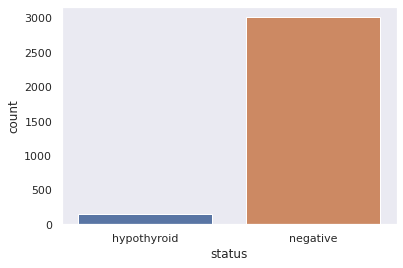

In [130]:
# Plotting the number of patients with hypothyroidism vis-a-vis those without
sns.set(style= "dark")
ax = sns.countplot(x="status", data=df)

> From our plot, we see that most of the patients tested negative for hypothyroidism

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_

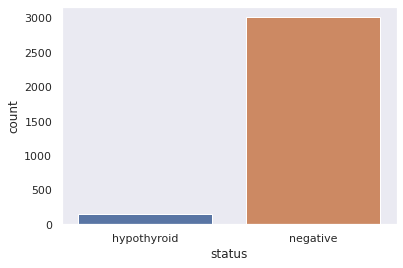

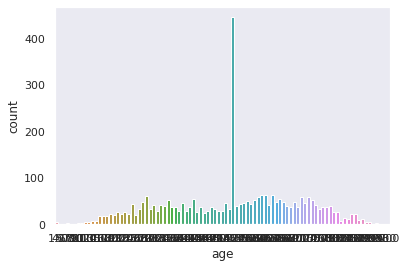

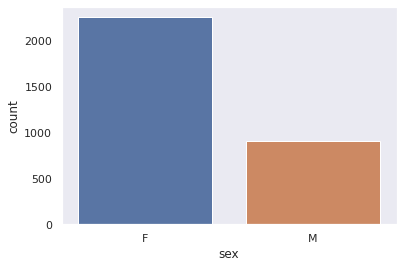

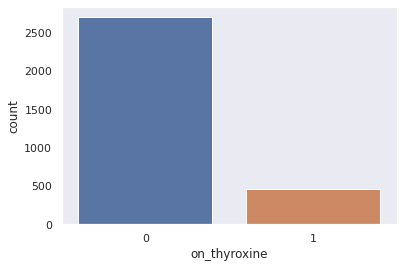

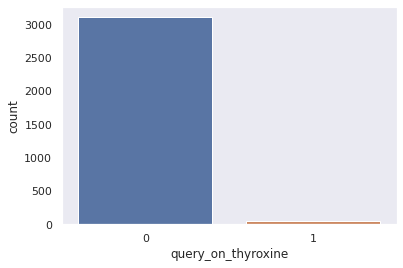

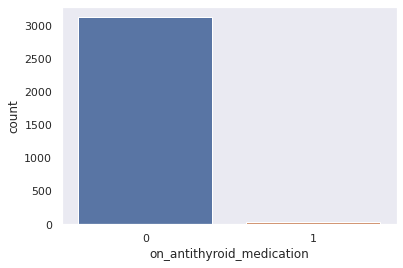

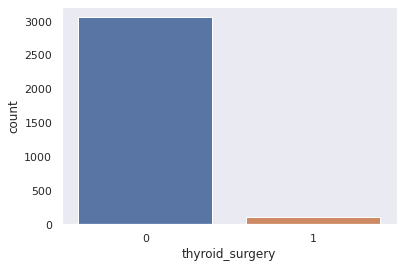

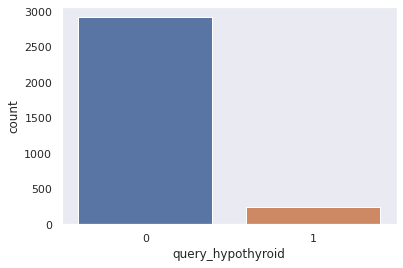

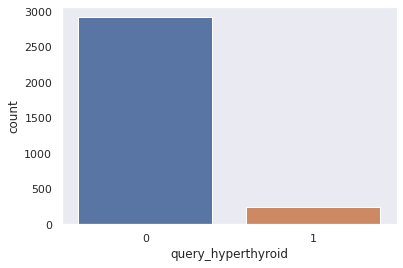

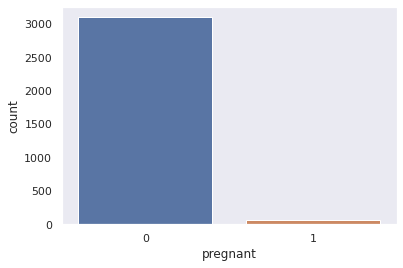

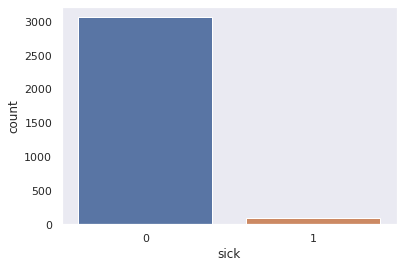

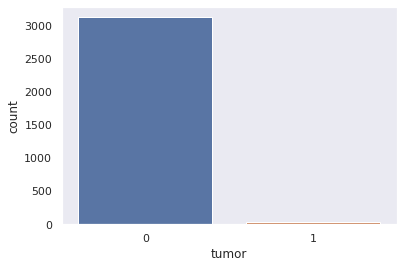

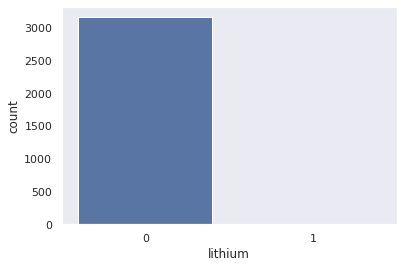

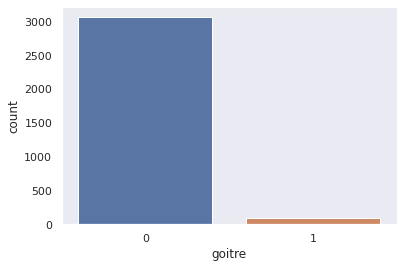

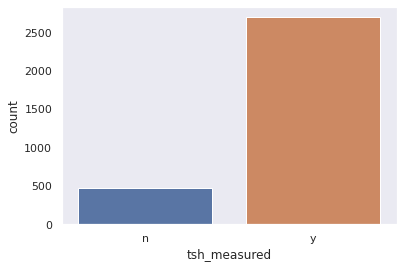

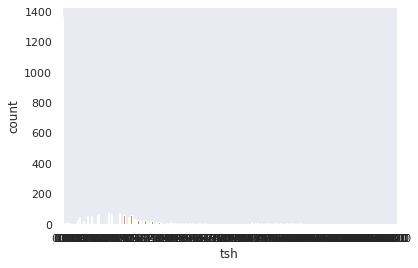

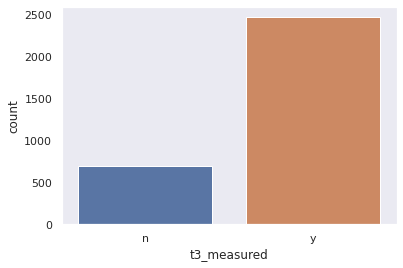

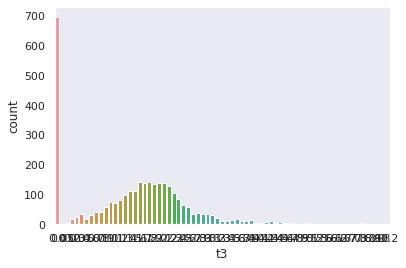

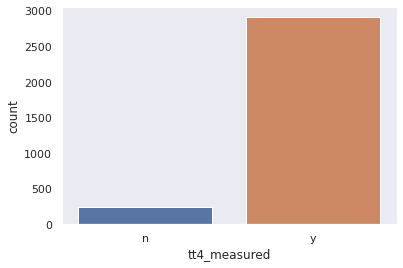

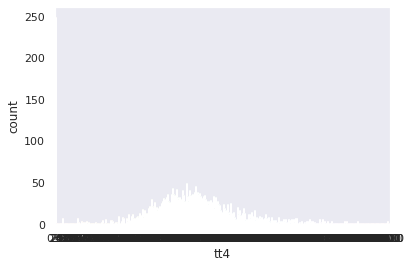

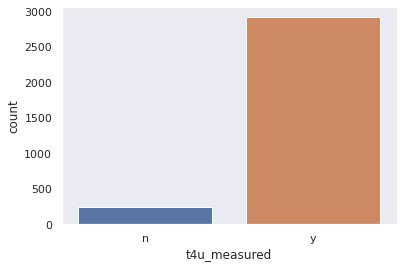

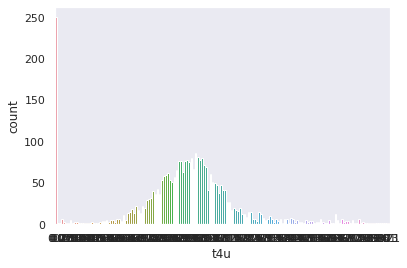

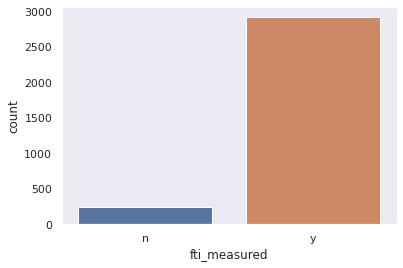

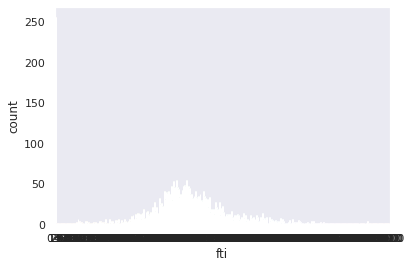

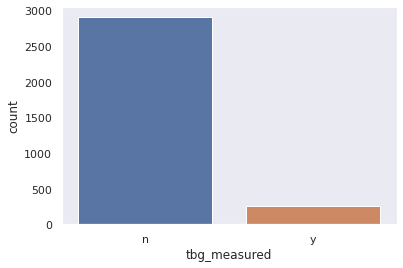

In [131]:
# Plotting distribution of patients across the different variables
#

for i, col in enumerate(df.columns):
    plt.figure(i)
    sns.countplot(x=col, data=df)



> From our plots above, we can see that most of our patients are negative. A very low portion of our patients suffer from hypothyroidism
>
> From our summary statistics earlier, we had seen that our modal age was 51. From our plot, we can see that that age has more than 5 times as many patients as compared to the other ages.
>
> We can also see that most of our patients were female. Actually, the male patients correspond to less than half of the total female patients. 
> 
> Patients who are currently on thyroxine correspond to less than a quarter of those who aren't.
>
> The values for patients with quesries on thyroxine, hypothyroidism & hyperthyroidoism are significantly low as compared to those without.
>
> Patients who are on anti-thyroid medication, have had thyroid surgery,are pregnant, sick, have a tumor or goitre, are extremely low as compared to those who have none of those conditions.
>
> We shall check on the relationships between our tests and other variables to comment appropriately on them, although we do have plots on their distributions as shown. Most patients were tested f

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warnin

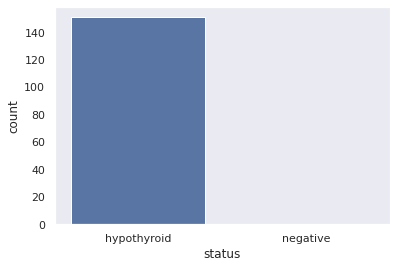

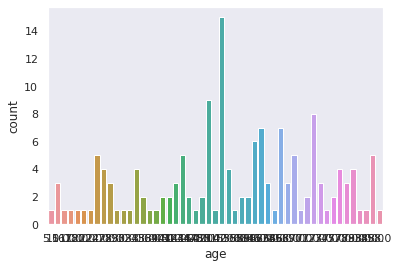

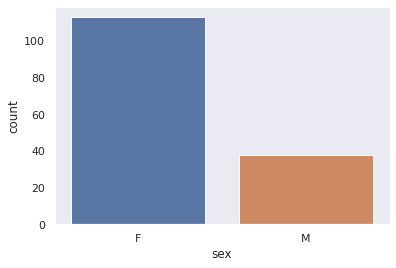

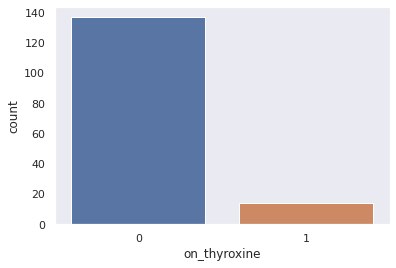

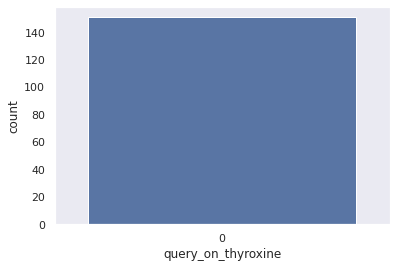

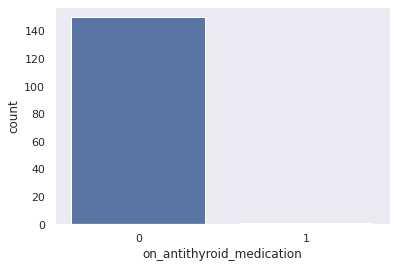

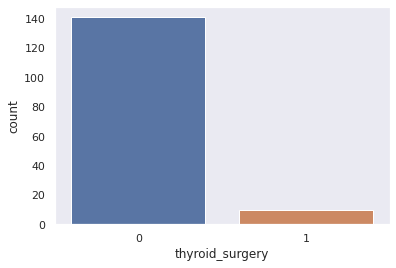

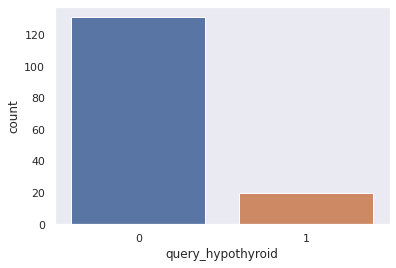

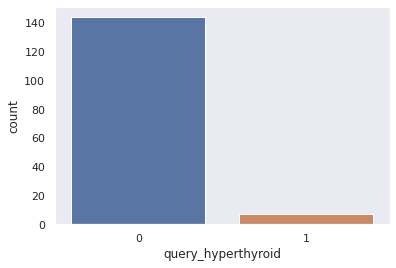

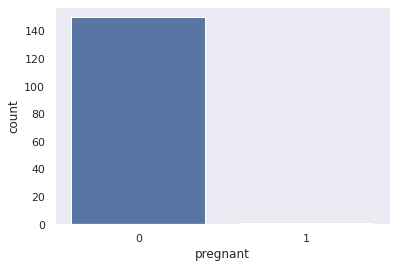

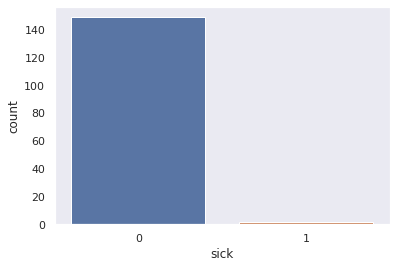

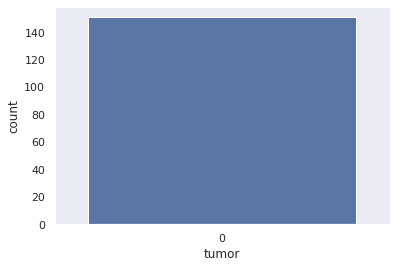

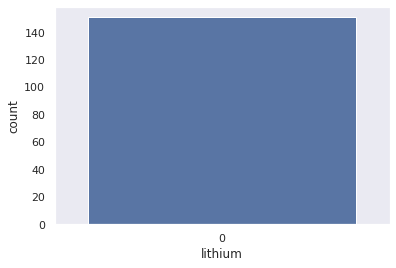

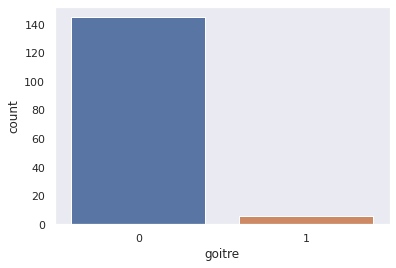

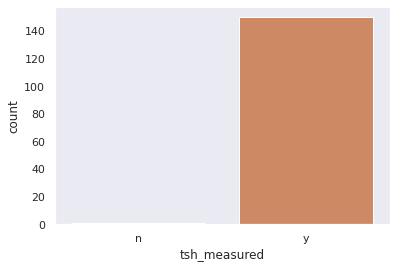

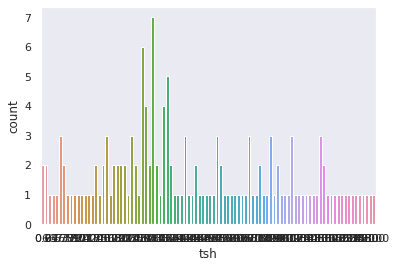

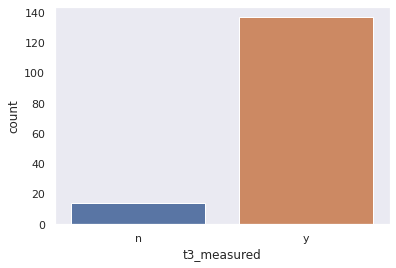

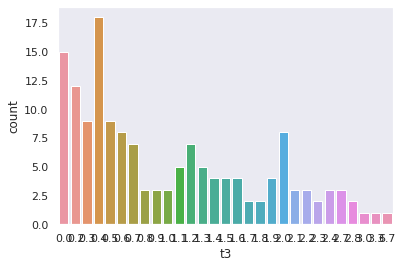

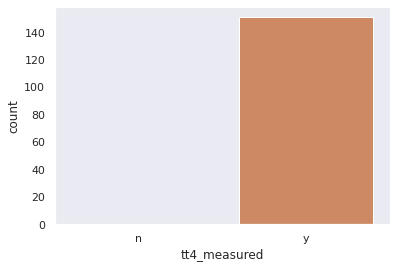

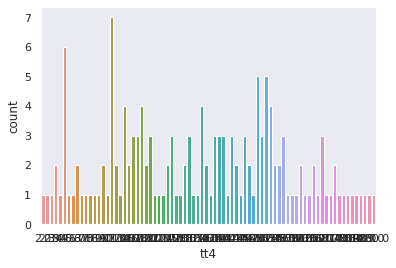

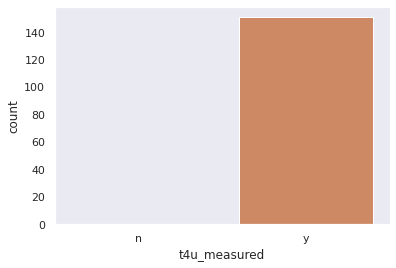

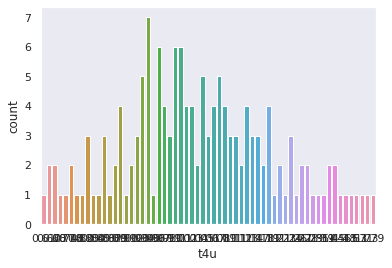

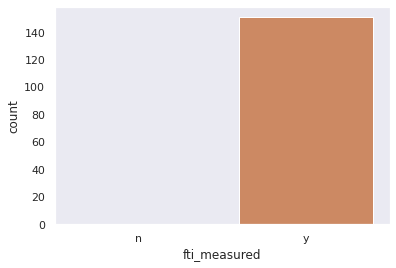

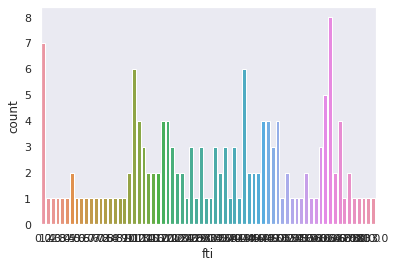

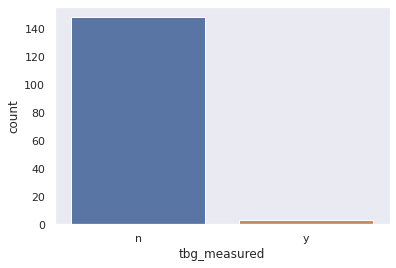

In [132]:
# Plotting distribution of patients suffering from hypothyroidism across the different variables
#
df1 = df[df['status'] == "hypothyroid"]
# df_1 = df_1.reset_index(inplace=True)

#df1 = df.select_dtypes([np.int, np.float])
for i, col in enumerate(df1.columns):
    plt.figure(i)
    sns.countplot(x=col, data=df1)

> Since we have filtered the dataset to contain patients suffering from hypothyroidism, all of our patients suffer from hypothyroidism
>
> We can still see that our modal age was 51, however the difference isn't as stark when we filter patients with hypothyroidism, as compared to the other ages.
>
> Most of our patients are still female & still correspond to more than twice the male. 
> 
> Patients who are currently on thyroxine are extremely few as compared to those who arent.
>
> The values for patients with quesries on thyroxine, hypothyroidism & hyperthyroidoism are significantly low as compared to those without.
>
> Patients who are on anti-thyroid medication, have had thyroid surgery,are pregnant, sick, have a tumor or goitre, are extremely low as compared to those who have none of those conditions.
>
> Most of the distributions for patients ith hypothyroidism are consistent with the general distributions above.

## Bivariate 

<Figure size 480x320 with 0 Axes>

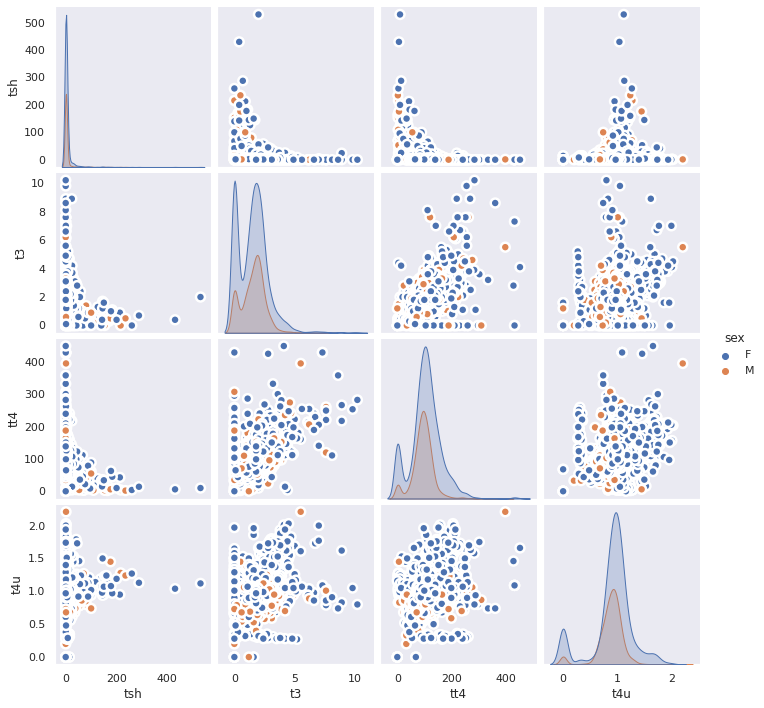

In [133]:
# Ploting our bivariate summaries and recording our observations
#
plt.figure(dpi= 80)
sns.pairplot(df[['tsh', 't3', 'tt4', 't4u', 'sex']], kind="scatter", hue="sex", plot_kws=dict(s=80, edgecolor="white", linewidth=2.5))
plt.show()

> We can see that t3 & tt4 and tt4 & t4u pairs have a relationship. Let's check this further with our correlation.

In [134]:
# Check for correlation
#
correlation = df_num.corr()
correlation

,age,tsh,t3,tt4,t4u,fti
age,1.000000,0.011725,-0.079260,-0.005226,-0.028418,0.072473
tsh,0.011725,1.000000,-0.085072,-0.220293,0.095537,-0.186038
t3,-0.079260,-0.085072,1.000000,0.502813,0.457418,0.336268
tt4,-0.005226,-0.220293,0.502813,1.000000,0.599128,0.763978
t4u,-0.028418,0.095537,0.457418,0.599128,1.000000,0.204452
fti,0.072473,-0.186038,0.336268,0.763978,0.204452,1.000000


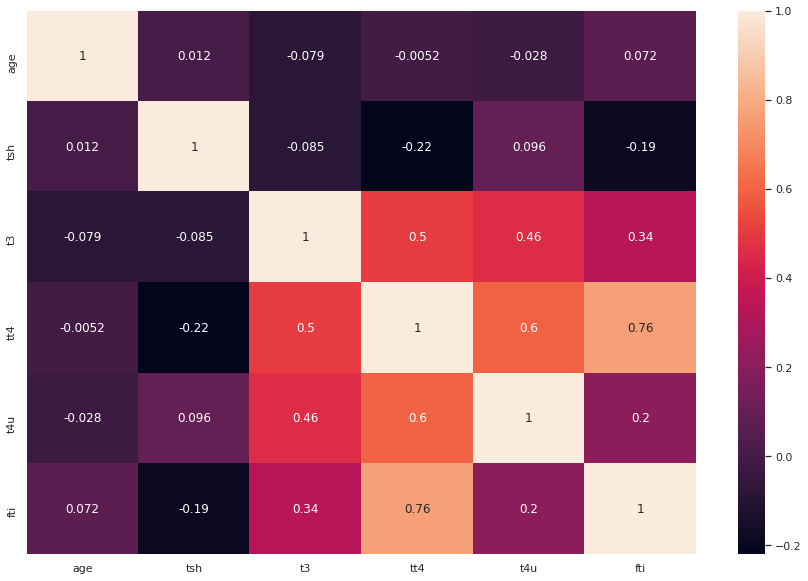

In [135]:
# Plotting a correlation heatmap
#
plt.figure(figsize = (15,10))
sns.heatmap(correlation, xticklabels=correlation.columns, yticklabels=correlation.columns, annot=True)

> We can see a high positive correlation between the fti & tt4 tests at 0.76 and tt4 & tu tests at 0.6. There is a low positive correlation between t3 & tt4, fti & t3, fti & t4u, t4u & t3 and tt4 & t3.  
T3 & age and t3 & tsh have low negative correlation.

## Multivariate Analysis

In [146]:
# We shall do LDA for our multivariate analysis, seeing as we are doing a supervised learning algorithm.
# We'll first divide our dataset into feature set and corresponding labels
X = df.drop(['status'],1)
y = df['status']

# Splitting the data into train and test sets
#
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 101)

# standardizing our data
#
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

lda = LDA(n_components = 1)
X_train = lda.fit_transform(X_train, y_train)
X_test = lda.transform(X_test)

# Printing symptoms that indicate whether a patient has hypothyroidism or not, in order of how much weight each of them carries 
#
factors = pd.DataFrame (index = X.columns.values, data = lda.coef_[0].T)
# pd.options.display.float_format = '{:.8f}'.float_format
factors.sort_values(0, ascending = False)

,0
tt4,3.501563
sick,0.198535
sex,0.180261
pregnant,0.170860
tumor,0.166874
t3,0.139745
query_on_thyroxine,0.123924
lithium,0.103668
query_hypothyroid,0.096633
on_thyroxine,0.054393


> From our LDA, we can see that tt4, whether a patient is sick, pregnant or has a tumor, their sex, has queries on hypothyroid & thyroxine or is on antithyroid medication are high at determining whether one has hypothyroidism.
>
> Those that least affect that are whether one has had thyroid surgery, goitre, queies on hyperthyroid, fti, t4u & tsh tests as well as one's age

# Modelling 


#### Feature Reduction

In [136]:
# Dropping the columns indicating whether one had a particular test done or not since this data will be available on the columns with the levels.
#
df = df.drop(['tsh_measured', 't3_measured', 'tt4_measured', 't4u_measured','fti_measured', 'tbg_measured'],axis=1)
df


,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,tsh,t3,tt4,t4u,fti
0,hypothyroid,72.0,M,0,0,0,0,0,0,0,0,0,0,0,30.0,0.6,15.0,1.48,10.0
1,hypothyroid,15.0,F,1,0,0,0,0,0,0,0,0,0,0,145.0,1.7,19.0,1.13,17.0
2,hypothyroid,24.0,M,0,0,0,0,0,0,0,0,0,0,0,0.0,0.2,4.0,1.00,0.0
3,hypothyroid,24.0,F,0,0,0,0,0,0,0,0,0,0,0,430.0,0.4,6.0,1.04,6.0
4,hypothyroid,77.0,M,0,0,0,0,0,0,0,0,0,0,0,7.3,1.2,57.0,1.28,44.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3158,negative,58.0,F,0,0,0,0,0,0,0,0,0,0,0,5.8,1.7,86.0,0.91,95.0
3159,negative,29.0,F,0,0,0,0,0,0,0,0,0,0,0,0.8,1.8,99.0,1.01,98.0
3160,negative,77.0,M,0,0,0,0,0,0,0,0,0,0,0,1.2,0.6,71.0,0.68,104.0
3161,negative,74.0,F,0,0,0,0,0,0,0,0,0,0,0,1.3,0.1,65.0,0.48,137.0


### Baseline Model

In [137]:
# Getting the dummy variables for the boolean columns in our dataset
df = pd.get_dummies(df, drop_first=True)
df

,age,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,tsh,t3,tt4,t4u,fti,status_negative,sex_M
0,72.0,0,0,0,0,0,0,0,0,0,0,0,30.0,0.6,15.0,1.48,10.0,0,1
1,15.0,1,0,0,0,0,0,0,0,0,0,0,145.0,1.7,19.0,1.13,17.0,0,0
2,24.0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.2,4.0,1.00,0.0,0,1
3,24.0,0,0,0,0,0,0,0,0,0,0,0,430.0,0.4,6.0,1.04,6.0,0,0
4,77.0,0,0,0,0,0,0,0,0,0,0,0,7.3,1.2,57.0,1.28,44.0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3158,58.0,0,0,0,0,0,0,0,0,0,0,0,5.8,1.7,86.0,0.91,95.0,1,0
3159,29.0,0,0,0,0,0,0,0,0,0,0,0,0.8,1.8,99.0,1.01,98.0,1,0
3160,77.0,0,0,0,0,0,0,0,0,0,0,0,1.2,0.6,71.0,0.68,104.0,1,1
3161,74.0,0,0,0,0,0,0,0,0,0,0,0,1.3,0.1,65.0,0.48,137.0,1,0


In [138]:
# Some of the names have been wrongly named, so we will rename them
#
df = df.rename(columns = {'sex_M' : 'sex','status_negative' : 'status'})
df

,age,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,tsh,t3,tt4,t4u,fti,status,sex
0,72.0,0,0,0,0,0,0,0,0,0,0,0,30.0,0.6,15.0,1.48,10.0,0,1
1,15.0,1,0,0,0,0,0,0,0,0,0,0,145.0,1.7,19.0,1.13,17.0,0,0
2,24.0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.2,4.0,1.00,0.0,0,1
3,24.0,0,0,0,0,0,0,0,0,0,0,0,430.0,0.4,6.0,1.04,6.0,0,0
4,77.0,0,0,0,0,0,0,0,0,0,0,0,7.3,1.2,57.0,1.28,44.0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3158,58.0,0,0,0,0,0,0,0,0,0,0,0,5.8,1.7,86.0,0.91,95.0,1,0
3159,29.0,0,0,0,0,0,0,0,0,0,0,0,0.8,1.8,99.0,1.01,98.0,1,0
3160,77.0,0,0,0,0,0,0,0,0,0,0,0,1.2,0.6,71.0,0.68,104.0,1,1
3161,74.0,0,0,0,0,0,0,0,0,0,0,0,1.3,0.1,65.0,0.48,137.0,1,0


In [144]:
# Since our question is a classification problem, we will use Logistic Regression for the baseline model.
from sklearn.linear_model import LogisticRegression

regression = LogisticRegression()
X = df.drop(['status'],axis=1)
y = df['status']
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=101)

#Fitting my Logistic Regression on the train data
#
regression.fit(X_train,y_train)

# Predicting the values based on the Logistic Regression
#
y_predict = regression.predict(X_test)

# Metrics
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_predict)))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_predict))


Root Mean Squared Error: 0.14517167628488534
Mean Squared Error: 0.02107481559536354


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


> Our model has an RMSE of 0.1451, which is very low, thus it is a good fit

#### Checking for Multicollinearity

In [148]:
# We will use the VIF core to check our multicollinearity
#
pd.DataFrame(np.linalg.inv(correlation.values), index = correlation.index, columns=correlation.columns)


,age,tsh,t3,tt4,t4u,fti
age,1.023120,-0.001172,0.105905,0.162424,-0.071710,-0.219406
tsh,-0.001172,1.172702,0.054313,0.758185,-0.536032,-0.269655
t3,0.105905,0.054313,1.424864,-0.389882,-0.400525,-0.096958
tt4,0.162424,0.758185,-0.389882,5.380662,-2.427449,-3.354024
t4u,-0.071710,-0.536032,-0.400525,-2.427449,2.399671,1.404058
fti,-0.219406,-0.269655,-0.096958,-3.354024,1.404058,3.273676


> All of our columns have no multicollinearity, except for the tt4 test which has 5.38. Since it is close to 5, we shall leave it and do feature importance in our random forest models.

### Decision Trees

In [151]:
# Defining the predictor and target variables.
#
X = df.drop(['status'],axis=1)
y = df['status']
# Building my model
#
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=101)
tree = DecisionTreeClassifier()
tree = tree.fit(X_train,y_train)
y_pred = tree.predict(X_test)

# Assessing the perfromance of the model.

print('Accuracy:', metrics.accuracy_score(y_test,y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

Accuracy: 0.9831401475237092
Root Mean Squared Error: 0.1298454946322391


> Our model has an accuracy of 98.31%, thus it did a good job predicting, however that means it is overfitting. We shall hyperparameter tuning on our random forest models and check if anything will change.
> 
> Our model has an RMSE of 0.1298, which is fairly low and thus our modelis a good fit.

###Random Forest Classifier Model

In [153]:
# Fitting our data in a Random Forest model.
#
forest = RandomForestClassifier(n_estimators=100,random_state=42,min_samples_split=20,max_depth=5)
forest.fit(X_train,y_train)

# Predicting using our test values.
#
y_predict = forest.predict(X_test)

#Printing out the mtrics which is the RMSE and the accuracy
print('Accuracy is:', metrics.accuracy_score(y_test,y_predict))
print('Root Mean Square Error: ', np.sqrt(metrics.mean_squared_error(y_test,y_predict)))

Accuracy is: 0.9799789251844047
Root Mean Square Error:  0.14149584734399578


> Our model has an accuracy of 98% which means still has overfitted. We will do a random search to reduce overfiting of our model.
>
> Our RMSE is 14% which is fairly small, meaning the test was a good fit.

In [ ]:
#Predicting using our test values.
y_predict = forest.predict(X_test)

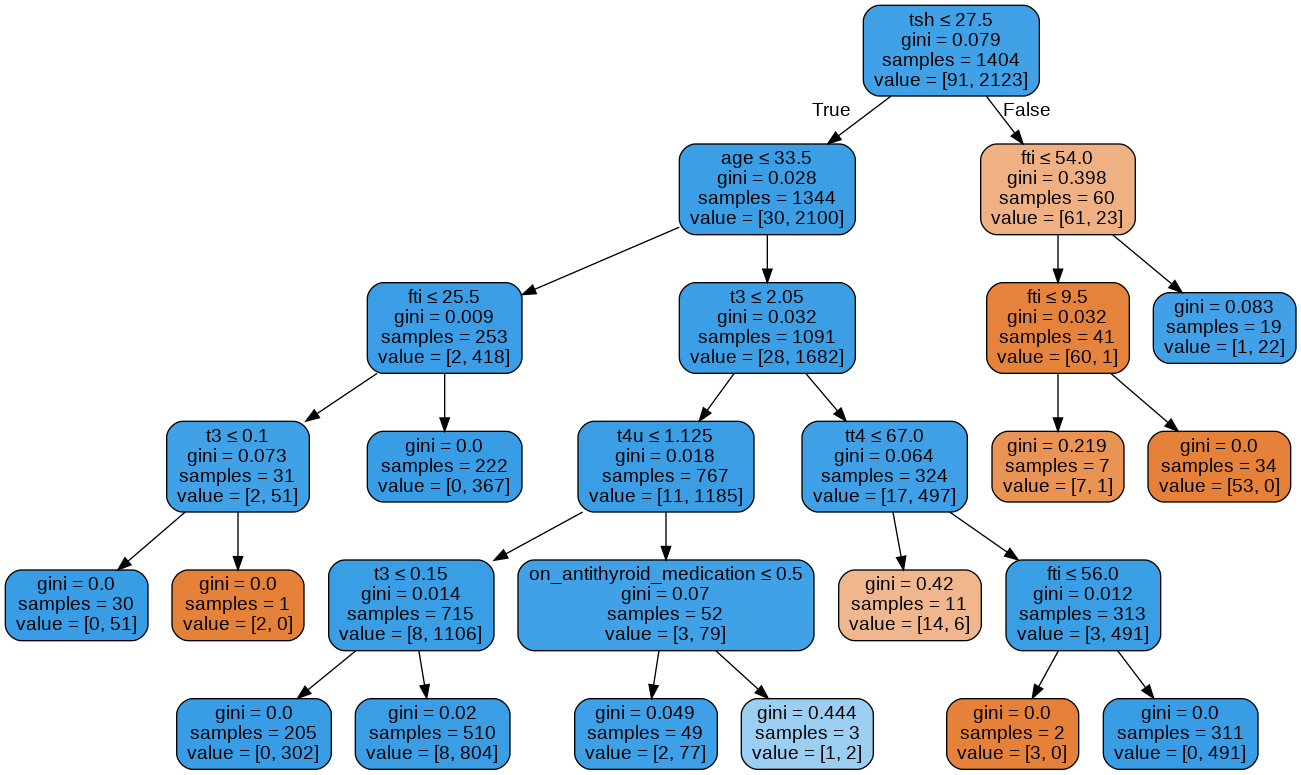

In [155]:
# Visualizing the decision tree of our 50th tree in our forest.
#
StringIO().write(str((1,2)))
tree = forest.estimators_[3]

dot_data = StringIO()
export_graphviz(tree, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = X.columns)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue()) 
graph.write_png('Hypothroidism') 
Image(graph.create_png())

In [156]:
# Hyperparamter Tuning
# Creating an array for the no of trees between 200 and 2000
#
n_estimators = [int(x) for x in np.linspace(start=200, stop=2000,num=10)]
# Defining the number of features to consider at every split
#
max_features = ['auto','sqrt']
#Estimating the number of levels in every tree
#
max_depth = [int(x) for x in np.linspace(10,110,num=11)]
max_depth.append(None)
# Estimating the number of samples required to split at every node
#
min_samples_split = [2,5,10]
# Estimating the number of samples at each leaf node
#
min_samples_leaf = [1,2,4]
# Defining the methods of selecting samples for training at each tree
#
bootstrap = [True,False]

In [159]:
# Creating a dictionary containing our defined hyperparamters
#
random_grid = {'n_estimators' : n_estimators,
               'max_features' : max_features,
               'max_depth' : max_depth,
               'min_samples_split' : min_samples_split,
               'min_samples_leaf' : min_samples_leaf,
               'bootstrap' : bootstrap}

# Random Searching for hyperparameters using a cross validation of 3 models and ensuring we use the full computational power
#
rf = RandomForestClassifier()
rf_random = RandomizedSearchCV(estimator=rf,param_distributions=random_grid,n_iter=100,cv=3,verbose=2,random_state=42,n_jobs=-1)               #
#Fitting our tuned hyperparameters
#
rf_random.fit(X_train,y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed:  4.4min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  8.3min finished


RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
               

In [161]:
# Searching for the best parameters for our model.
#
rf_random.best_params_

{'bootstrap': False,
 'max_depth': 90,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 5,
 'n_estimators': 800}

I found that the optimal hyperparameters are :
*   The method of selecting samples for training should be False ie bootstrap
*   The maxiumum number of levels in a tree should be 90
*   The number of features to consider at every split should be auto
*   The minimum number of samples required at each leaf node is 1 sample
*   The minimum number of samples required to split a node is 2
*   The optimal number of trees in our forest should be 800 trees.

This will help us know the best optimal way to make our model peform better and reduce overfitting.

In [163]:
# Defining our hyperparameters in the random forest classifier model
#
forest = RandomForestClassifier(n_estimators=1000,random_state=42,min_samples_split=2,max_depth=50,bootstrap='False',max_features='auto',min_samples_leaf=1)

# Fitting the train data in our tuned model.
#
forest.fit(X_train,y_train)

RandomForestClassifier(bootstrap='False', ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=50, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=1000,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [164]:
# Predicting the values in our test set
#
y_predict = forest.predict(X_test)
#Printing out the accuracy of our tuned model which will be used as our metric assessing our model.
print('Accuracy is', metrics.accuracy_score(y_test,y_predict))
print('Root Mean Square Error: ', np.sqrt(metrics.mean_squared_error(y_test,y_predict)))

Accuracy is 0.9841938883034773
Root Mean Square Error:  0.12572235957268166


> Our accuracy has increased, while our RMSE has dropped, thus our model has improved.

In [165]:
important_feat = pd.DataFrame({'feature': X.columns, 'importance': forest.feature_importances_}).set_index('feature').sort_values(by = 'importance', ascending = False)
important_feat

,importance
feature,
tsh,0.390306
fti,0.215672
tt4,0.181556
t4u,0.075481
t3,0.067186
age,0.035574
on_thyroxine,0.008062
query_hypothyroid,0.007732
sex,0.005789


> According to the random forest, our most important features are tsh, fti, tt4, t4u, tt3, & age. This is a contrast with our earlier results on LDA since we have used differnt metods in measuring the importance.

# Evaluation